In [184]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [185]:
import matplotlib.pyplot as plt
import pandas as pd

print(pd.__version__)

2.1.4


## Importing datasets

The sample datasets are located in `./data`.
The latest datasets can be obtained from [Land Transport Datamall](https://datamall.lta.gov.sg/content/datamall/en/dynamic-data.html#Public%20Transport).

In [186]:
origin_destination_train = pd.read_csv('./data/origin_destination_train_202511.csv')
node_train = pd.read_csv('./data/transport_node_train_202511.csv')

origin_destination_train['TIME_PER_HOUR'] = origin_destination_train['TIME_PER_HOUR'].replace(to_replace = 0, value = 24)
node_train['TIME_PER_HOUR'] = node_train['TIME_PER_HOUR'].replace(to_replace = 0, value = 24)

In [187]:
def get_stations_data(station_codes, day_type, combine = False):
    data = node_train[(node_train['PT_CODE'].isin(station_codes)) & (node_train['DAY_TYPE'] == day_type)]
    if (combine):
        data = data[['TIME_PER_HOUR', 'TOTAL_TAP_IN_VOLUME', 'TOTAL_TAP_OUT_VOLUME']]
        return data.groupby('TIME_PER_HOUR').agg({'TIME_PER_HOUR': 'first', 'TOTAL_TAP_IN_VOLUME': 'sum', 'TOTAL_TAP_OUT_VOLUME': 'sum'})
    else:
        return data[['TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME', 'TOTAL_TAP_OUT_VOLUME']]

def get_trips_data(origin_codes, destination_codes, day_type, combine = False):
    data = origin_destination_train[(origin_destination_train['ORIGIN_PT_CODE'].isin(origin_codes)) & (origin_destination_train['DESTINATION_PT_CODE'].isin(destination_codes)) & (origin_destination_train['DAY_TYPE'] == day_type)]
    if (combine):
        data = data[['TIME_PER_HOUR', 'TOTAL_TRIPS']]
        return data.groupby('TIME_PER_HOUR').agg({'TIME_PER_HOUR': 'first', 'TOTAL_TRIPS': 'sum'})
    else:
        return data[['TIME_PER_HOUR', 'ORIGIN_PT_CODE', 'DESTINATION_PT_CODE', 'TOTAL_TRIPS']]

def plot_stations_data(weekday_stations_data, weekend_stations_data, stations_list_name, print_dataset):
    plt.plot(weekday_stations_data['TIME_PER_HOUR'], weekday_stations_data['TOTAL_TAP_IN_VOLUME'], label = 'Weekday tap in')
    plt.plot(weekday_stations_data['TIME_PER_HOUR'], weekday_stations_data['TOTAL_TAP_OUT_VOLUME'], label = 'Weekday tap out')
    plt.plot(weekend_stations_data['TIME_PER_HOUR'], weekend_stations_data['TOTAL_TAP_IN_VOLUME'], label = 'Weekend tap in')
    plt.plot(weekend_stations_data['TIME_PER_HOUR'], weekend_stations_data['TOTAL_TAP_OUT_VOLUME'], label = 'Weekend tap out')
    plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left')
    plt.title(stations_list_name)
    plt.xlabel("Time")
    plt.ylabel("Number of tap in and tap out")

    plt.show()

    if print_dataset:
        print(weekday_stations_data)
        print(weekend_stations_data)

def plot_trips_data(weekday_trips_data, weekend_trips_data, origin_list_name, destination_list_name, print_dataset):
    plt.plot(weekday_trips_data['TIME_PER_HOUR'], weekday_trips_data['TOTAL_TRIPS'], label = 'Weekday')
    plt.plot(weekend_trips_data['TIME_PER_HOUR'], weekend_trips_data['TOTAL_TRIPS'], label = 'Weekend')
    plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left')
    plt.title("No. of trips from " + origin_list_name + " to " + destination_list_name)
    plt.xlabel("Time")
    plt.ylabel("Number of trips")

    plt.show()

    if print_dataset: 
        print(weekday_trips_data)
        print(weekend_trips_data)

## Some station lists

Some useful station lists that can be used as input.

In [188]:
# HDB TOWNS
ANG_MO_KIO = ['NS15', 'NS16', 'TE6']
BEDOK = ['DT28', 'DT29', 'DT30', 'EW4', 'EW5', 'EW6']
BISHAN = ['NS17/CC15', 'CC16', 'TE7', 'TE8']
BUKIT_BATOK = ['NS2', 'NS3']
BUKIT_MERAH = ['EW16/NE3/TE17', 'EW17', 'EW18', 'TE16', 'CC27', 'CC28', 'NE1/CC29']
BUKIT_PANJANG = ['BP6/DT1', 'DT2', 'BP7', 'BP8', 'BP9', 'BP10', 'BP11', 'BP12', 'BP13']
BUKIT_TIMAH_ESTATE = ['DT5']
CHOA_CHU_KANG = ['NS4/BP1', 'NS5', 'BP2', 'BP3', 'BP4', 'BP5']
CLEMENTI = ['EW23']
FARRER_ROAD_ESTATE = ['CC20']
GEYLANG = ['EW7', 'EW8/CC9', 'EW9', 'DT25', 'DT26/CC10', 'DT27']
HOUGANG = ['NE13', 'NE14']
JURONG_EAST = ['EW24/NS1', 'EW25']
JURONG_WEST = ['EW26', 'EW27', 'EW28']
KALLANG_WHAMPOA = ['EW10', 'EW11', 'DT23', 'DT24', 'NE7/DT12', 'NE8', 'NE9', 'NS20']
MARINE_PARADE_ESTATE = ['TE26', 'TE27']
PASIR_RIS = ['EW1']
PUNGGOL = ['NE17/PTC', 'NE18', 'PE1', 'PE2', 'PE3', 'PE4', 'PE5', 'PE6', 'PE7', 'PW1', 'PW2', 'PW3', 'PW4', 'PW5', 'PW6', 'PW7']
QUEENSTOWN = ['EW19', 'EW20', 'EW21/CC22', 'EW22', 'CC21', 'CC23']
SEMBAWANG = ['NS11', 'NS12']
SENGKANG = ['NE15', 'NE16/STC', 'SE1', 'SE2', 'SE3', 'SE4', 'SE5', 'SW1', 'SW2', 'SW3', 'SW4', 'SW5', 'SW6', 'SW7', 'SW8']
SERANGOON = ['NE11', 'NE12/CC13', 'CC14', 'CC12']
TAMPINES = ['EW2/DT32', 'EW3', 'DT31', 'DT33']
TENGAH = []
TOA_PAYOH = ['NS18', 'NS19', 'CC17/TE9', 'NE10']
WOODLANDS = ['NS8', 'NS9/TE2', 'NS10', 'TE1', 'TE3']
YISHUN = ['NS13', 'NS14']

# AREAS
WEST = ['EW23', 'EW24/NS1', 'EW25', 'EW26', 'EW27', 'EW28', 'EW29', 'EW30', 'EW31', 'EW32', 'EW33', 'NS2', 'NS3', 'NS4/BP1', 'NS5', 'BP2', 'BP3', 'BP4', 'BP5', 'BP6/DT1', 'DT2', 'DT3', 'DT4', 'BP7', 'BP8', 'BP9', 'BP10', 'BP11', 'BP12', 'BP13']
NORTH = ['NS7', 'NS8', 'NS9/TE2', 'NS10', 'NS11', 'NS12', 'NS13', 'NS14', 'TE1', 'TE3', 'TE4']
NORTH_EAST = ['NS15', 'NS16', 'NE12/CC13', 'NE13', 'NE14', 'NE15', 'NE16/STC', 'SE1', 'SE2', 'SE3', 'SE4', 'SE5', 'SW1', 'SW2', 'SW3', 'SW4', 'SW5', 'SW6', 'SW7', 'SW8', 'NE17/PTC', 'NE18', 'PE1', 'PE2', 'PE3', 'PE4', 'PE5', 'PE6', 'PE7', 'PW1', 'PW2', 'PW3', 'PW4', 'PW5', 'PW6', 'PW7', 'CC11', 'CC12', 'CC14', 'TE5', 'TE6']
EAST = ['EW1', 'EW2/DT32', 'EW3', 'EW4', 'EW5', 'EW6', 'CG1/DT35', 'CG2', 'DT28', 'DT29', 'DT30', 'DT31', 'DT33', 'DT34', 'TE27', 'TE28', 'TE29']
CENTRAL = ['EW7', 'EW8/CC9', 'EW9', 'EW10', 'EW11', 'EW16/NE3/TE17', 'EW17', 'EW18', 'EW19', 'EW20', 'EW21/CC22', 'EW22', 'NS17/CC15', 'NS18', 'NS19', 'NS20', 'NS21/DT11', 'NE7/DT12', 'NE1/CC29', 'NE8', 'NE9', 'NE10', 'NE11', 'CC6', 'CC7', 'CC8', 'CC10/DT26', 'CC16', 'CC17/TE9', 'CC19/DT9', 'CC20', 'CC21', 'CC23', 'CC24', 'CC25', 'CC26', 'CC27', 'CC28', 'DT5', 'DT6', 'DT7', 'DT8', 'DT10/TE11', 'DT23', 'DT24', 'DT25', 'DT27', 'TE7', 'TE8', 'TE12', 'TE13', 'TE16', 'TE23', 'TE24', 'TE25', 'TE26']
CENTRAL_AREA = ['EW12/DT14', 'EW13/NS25', 'EW14/NS26', 'EW15', 'NS22/TE14', 'NS23', 'NS24/NE6/CC1', 'NS27/CE2/TE20', 'NS28', 'NE4/DT19', 'NE5', 'CC2', 'CC3', 'CC4/DT15', 'CC5', 'CE1/DT16', 'DT13', 'DT17', 'DT18', 'DT20', 'DT21', 'DT22', 'TE15', 'TE18', 'TE19', 'TE22']


## MRT Map
![Image](./images/system_map.png)

## Tap In Tap Out At Station(s)
Get the number of passengers tapping and tapping out at a station at each hour.

You can either input a list of station codes yourself or use one of the lists above.
For interchange stations, the order of station codes should be EW, NS, BP, NE, CC, DT, TE.

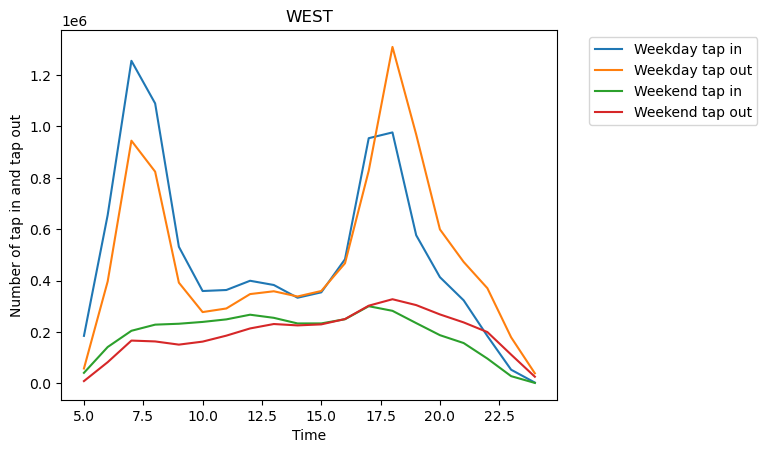

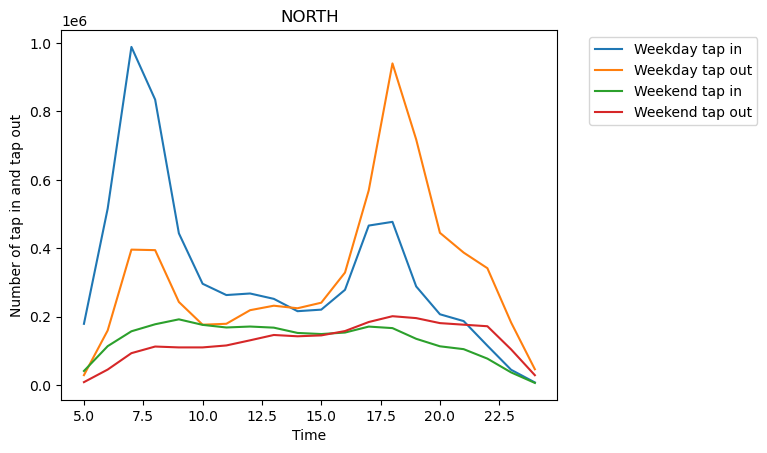

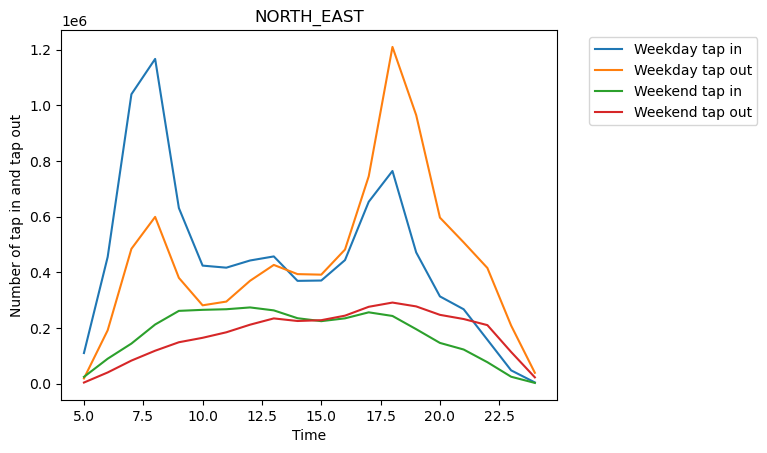

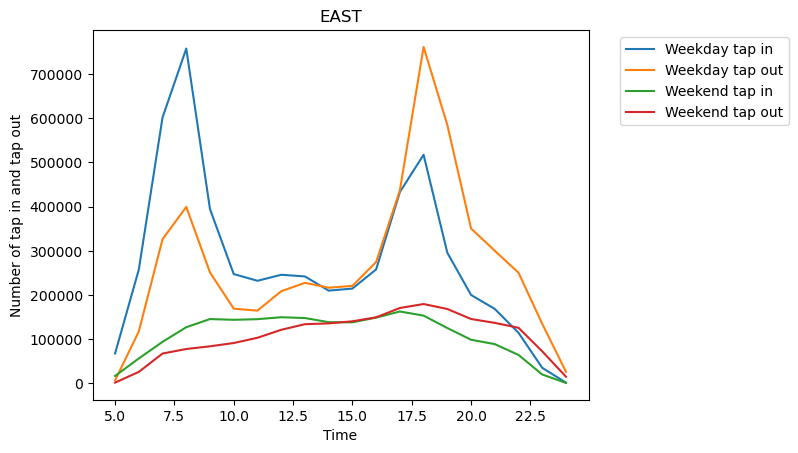

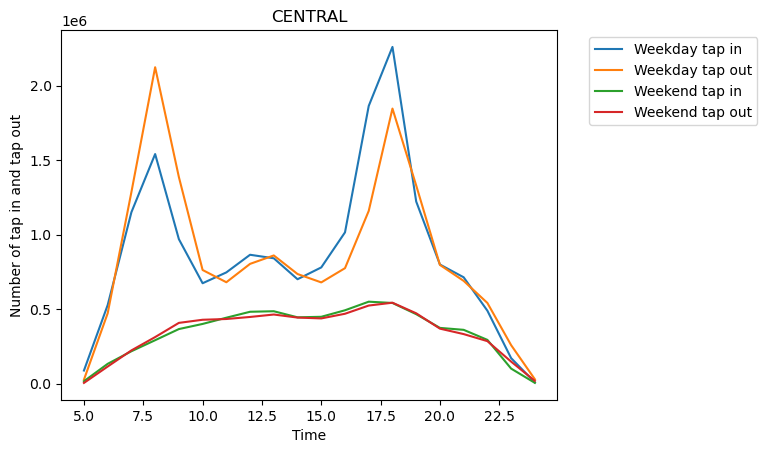

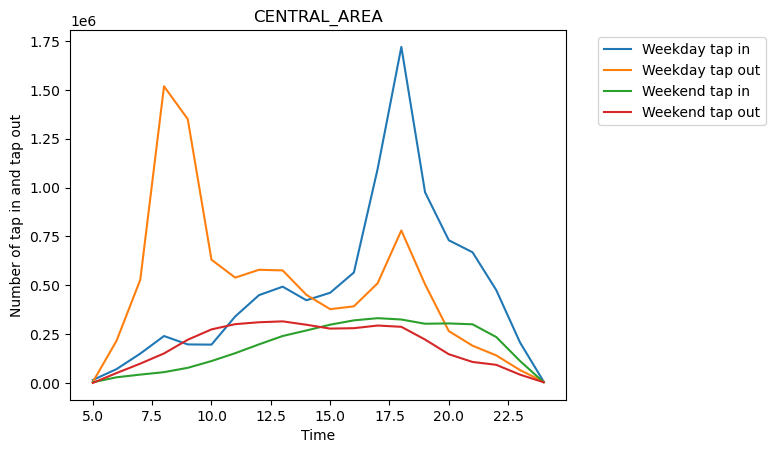

In [189]:
#Input the station codes or lists here. A list of lists is expected here. Use + to concatenate two lists.
#station_codes_lists = [[]]
station_codes_lists = [WEST, NORTH, NORTH_EAST, EAST, CENTRAL, CENTRAL_AREA]

#The corresponding names of each list. Optional.
#station_codes_lists_name = []
station_codes_lists_name = ["WEST", "NORTH", "NORTH_EAST", "EAST", "CENTRAL", "CENTRAL_AREA"]

#Whether to print the dataset
print_dataset = False

for i, station_codes in enumerate(station_codes_lists):
    weekday_stations_data = get_stations_data(station_codes, "WEEKDAY", combine = True)
    weekend_stations_data = get_stations_data(station_codes, "WEEKENDS/HOLIDAY", combine = True)

    if (len(station_codes_lists_name) == len(station_codes_lists)):
        stations_list_name = station_codes_lists_name[i]
    else:
        stations_list_name = ""
    
    plot_stations_data(weekday_stations_data, weekend_stations_data, stations_list_name, print_dataset)

## Number of trips between stations

Get the number of passengers tapping in at the origin stations and tapping out at the destination stations.

You can either input a list of station codes yourself or use one of the lists above.
For interchange stations, the order of station codes should be EW, NS, BP, NE, CC, DT, TE.

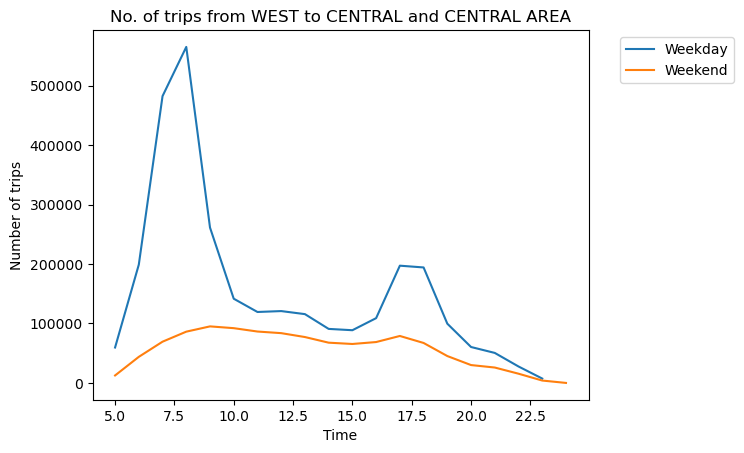

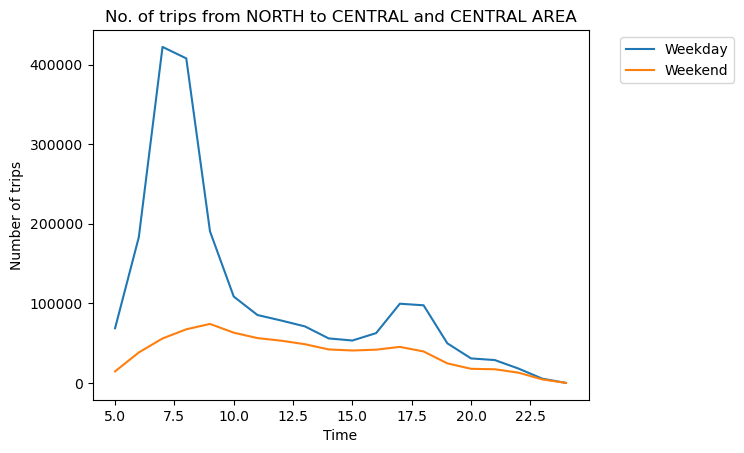

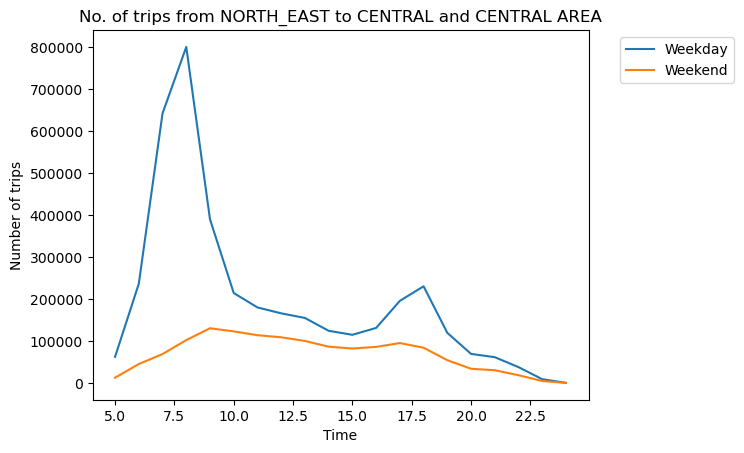

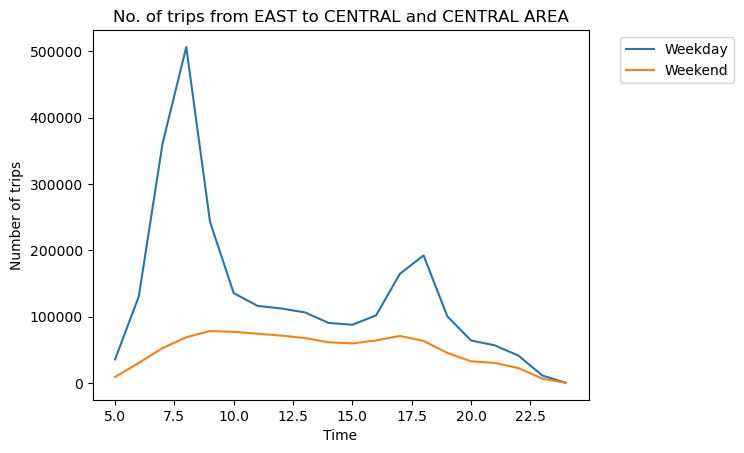

In [190]:
#Input the station codes or lists here. A list of lists is expected here. Use + to concatenate two lists.
origin_codes_lists = [WEST, NORTH, NORTH_EAST, EAST]
destination_codes_lists = [CENTRAL_AREA + CENTRAL]
#origin_codes_lists = [WEST, NORTH, NORTH_EAST, EAST, CENTRAL, CENTRAL_AREA] 
#destination_codes_lists = [WEST, NORTH, NORTH_EAST, EAST, CENTRAL, CENTRAL_AREA] 


#The corresponding names of the list. Optional.
origin_codes_lists_name = ["WEST", "NORTH", "NORTH_EAST", "EAST"]
destination_codes_lists_name = ["CENTRAL and CENTRAL AREA"]
#origin_codes_lists_name = ["WEST", "NORTH", "NORTH_EAST", "EAST", "CENTRAL", "CENTRAL_AREA"]
#destination_codes_lists_name = ["WEST", "NORTH", "NORTH_EAST", "EAST", "CENTRAL", "CENTRAL_AREA"]

#Whether to print the dataset
print_dataset = False

#Whether to permutate the origin and destination lists
permutate = True

origin_codes_lists_name_is_valid = len(origin_codes_lists_name) == len(origin_codes_lists) 
destination_codes_lists_name_is_valid = len(destination_codes_lists_name) == len(destination_codes_lists)


for i, origin_codes in enumerate(origin_codes_lists):
    for j, destination_codes in enumerate(destination_codes_lists):
        if permutate or i == j:
            weekday_trips_data = get_trips_data(origin_codes, destination_codes, "WEEKDAY", combine = True)
            weekend_trips_data = get_trips_data(origin_codes, destination_codes, "WEEKENDS/HOLIDAY", combine = True)

            if (origin_codes_lists_name_is_valid):
                origin_list_name = origin_codes_lists_name[i]
            else:
                origin_list_name = ""

            if (destination_codes_lists_name_is_valid):
                destination_list_name = destination_codes_lists_name[j]
            else:
                destination_list_name = ""
        
            plot_trips_data(weekday_trips_data, weekend_trips_data, origin_list_name, destination_list_name, print_dataset)